<h1 align = "center">
Stock Market Analysis Project</h1>

<p align = "center">
<img src = './images.jpeg'>
<p>

#### In this project, we're going to look at the data of big Indian tech companies like Infosys, Wipro, TCS, and HCL from the stock market. We'll use a tool called yfinance to get this stock information. To make things clearer, we'll use pictures and charts created with seaborn and matplotlib. The main goal is to understand how risky these stocks are by looking at how they performed in the past. We're basically trying to see if there are any patterns or trends that can tell us how safe or risky it might be to invest in these companies.

#### We will find the answers for the following questions:
1) What was the change in price of  the stock over time?
2) What was the Daily Returns of the stock on average?
3) What was the volatility of the stock?
4) what was the cumulative return of the stock?
5) What was moving average of the stocks?
6) What was the correlation between different stocks?


In [30]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('dark_background')
import matplotlib.dates as dates
import seaborn as sns
import datetime as dt

import yfinance as yf

#### This code downloads three years of stock data. It creates a list (company_list) and appends each company's data to it. After adding readable company names, it combines all the data into a single DataFrame (df)

In [2]:
stock_names = ['INFY.BO', 'WIPRO.BO', 'TCS.BO', 'HCLTECH.BO']

end = dt.datetime.now()
start = dt.datetime(end.year - 3, end.month, end.day)

company_list = []

for stock in stock_names:
    df = yf.download(stock, start, end)
    df["company_name"] = stock.split('.')[0]  # Adding a 'company_name' column in df to get the company name
    company_list.append(df)

df.head(5)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-02-15,972.000000,972.000000,950.450012,954.500000,921.617920,271888,HCLTECH
2021-02-16,959.299988,962.849976,944.150024,952.950012,920.121277,97504,HCLTECH
2021-02-17,952.900024,958.000000,941.000000,943.200012,910.707153,239907,HCLTECH
2021-02-18,945.799988,956.500000,938.500000,948.450012,915.776306,144083,HCLTECH
2021-02-19,950.000000,958.000000,944.099976,950.000000,917.272949,277619,HCLTECH


#### Let's give some variables to get specific company data

In [3]:
infy = company_list[0]
wipro = company_list[1]
tcs = company_list[2]
hcl = company_list[3]

In [4]:
tcs.describe()

,Open,High,Low,Close,Adj Close,Volume
count,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,3412.312691,3440.927029,3380.238906,3410.612761,3327.630329,1.366110e+05
std,250.295755,253.238418,248.685246,251.213529,259.810427,1.854285e+05
min,2930.000000,2964.949951,2701.000000,2896.050049,2796.254883,1.129200e+04
25%,3215.000000,3241.649902,3193.199951,3216.000000,3129.752686,5.211400e+04
50%,3373.000000,3393.800049,3348.750000,3373.949951,3295.294434,8.824100e+04
75%,3583.949951,3613.000000,3546.050049,3583.949951,3508.148193,1.396520e+05
max,4140.149902,4184.549805,4106.100098,4149.149902,4149.149902,1.742719e+06


In [5]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 725 entries, 2021-02-15 to 2024-02-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          725 non-null    float64
 1   High          725 non-null    float64
 2   Low           725 non-null    float64
 3   Close         725 non-null    float64
 4   Adj Close     725 non-null    float64
 5   Volume        725 non-null    int64  
 6   company_name  725 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 45.3+ KB


In [6]:
com_names = ['INFOSYS' , "WIPRO" , "TCS" , "HCL"]

def mychart(data , column , label):
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(top=1.25, bottom=1.2)

    for i, company in enumerate(data, 1):
        plt.subplot(2, 2, i)
        company[column].plot(color = 'green')
        plt.ylabel(column.capitalize())
        plt.xlabel(None)
        plt.title(f"{label} {com_names[i-1] }")
    
    plt.tight_layout()

###  Historical view of the closing price

In this I have used enumerate.
'enumerate' is a built-in Python function that allows you to iterate over a sequence (e.g., a list, tuple, or string) while keeping track of the index of each item. It returns a tuple containing the index and the value of each element.

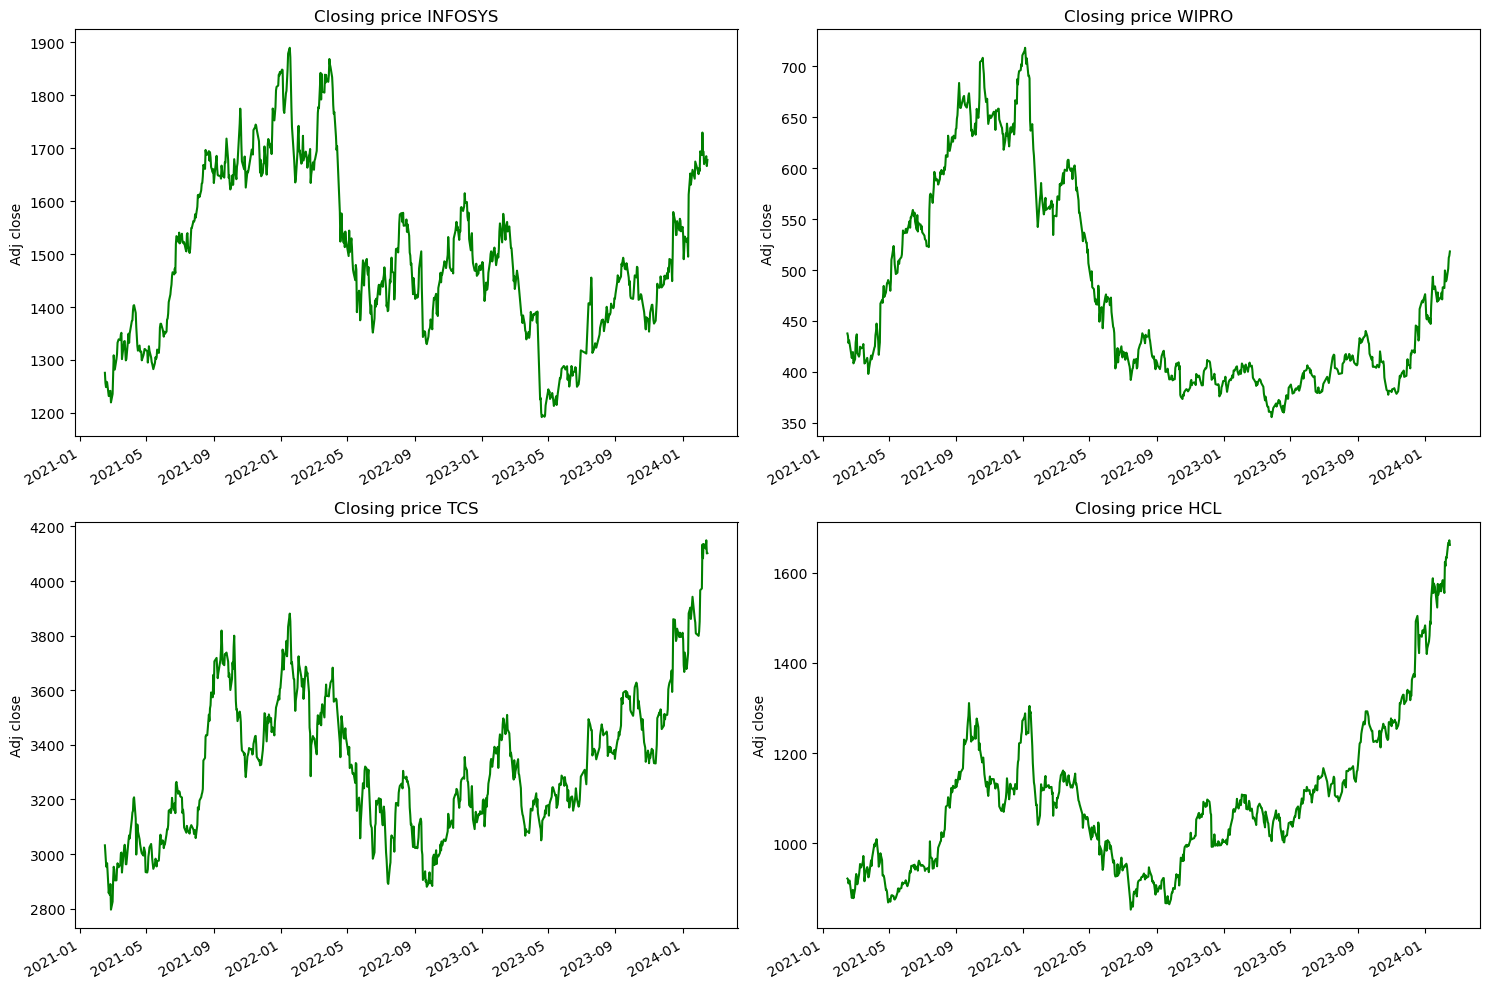

In [7]:
mychart(company_list , 'Adj Close' , 'Closing price')

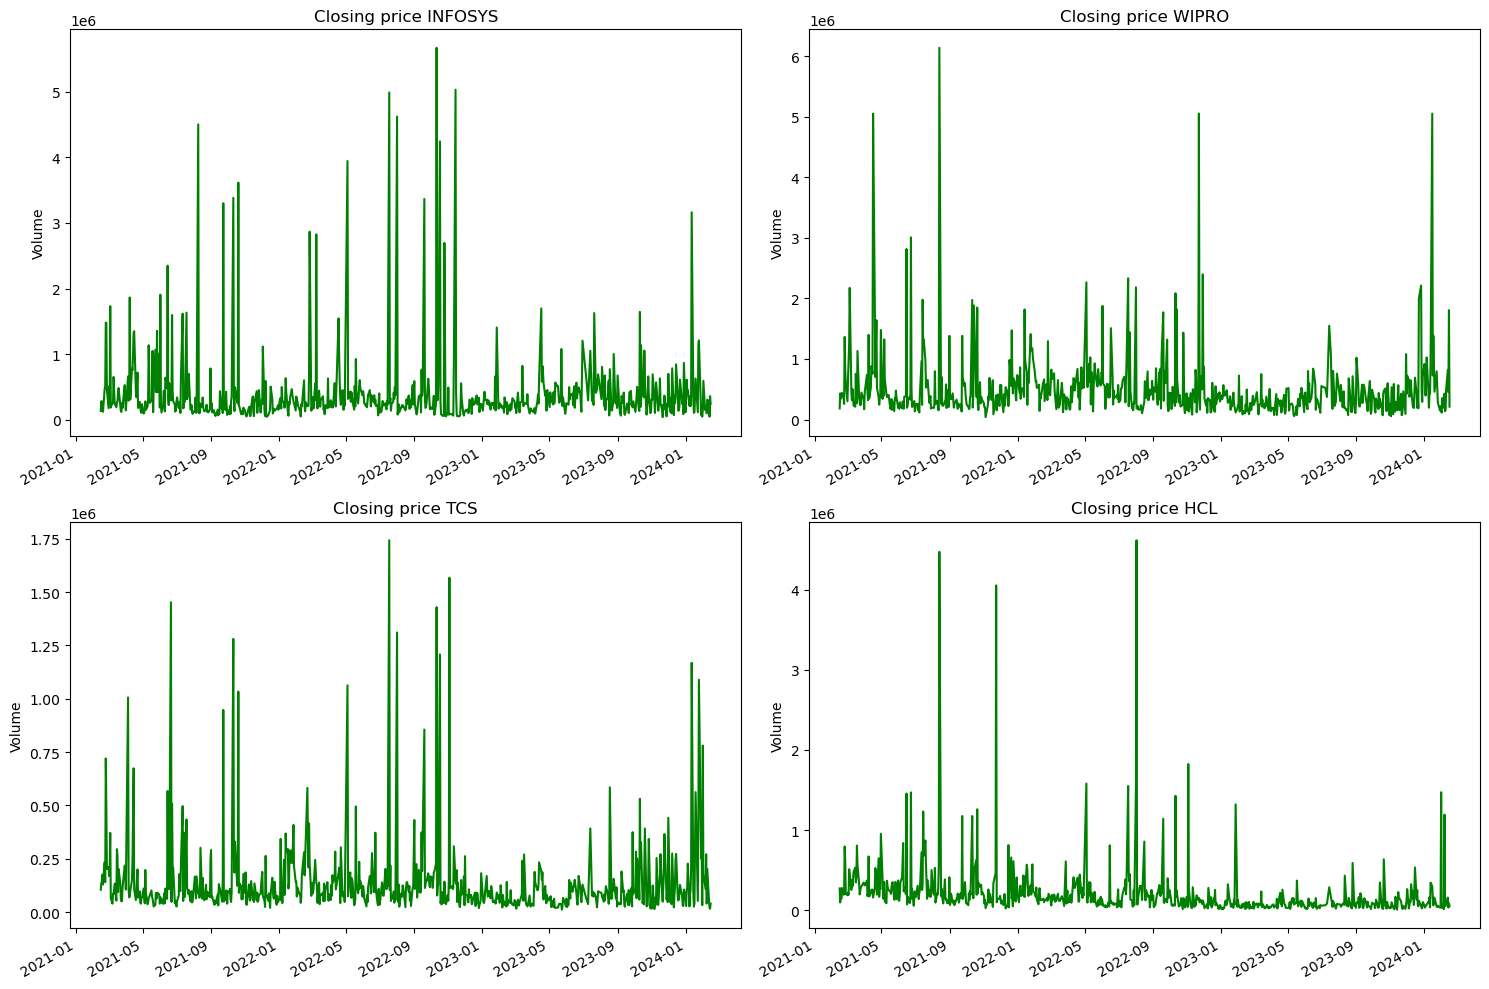

In [8]:
mychart(company_list , 'Volume' , 'Closing price')

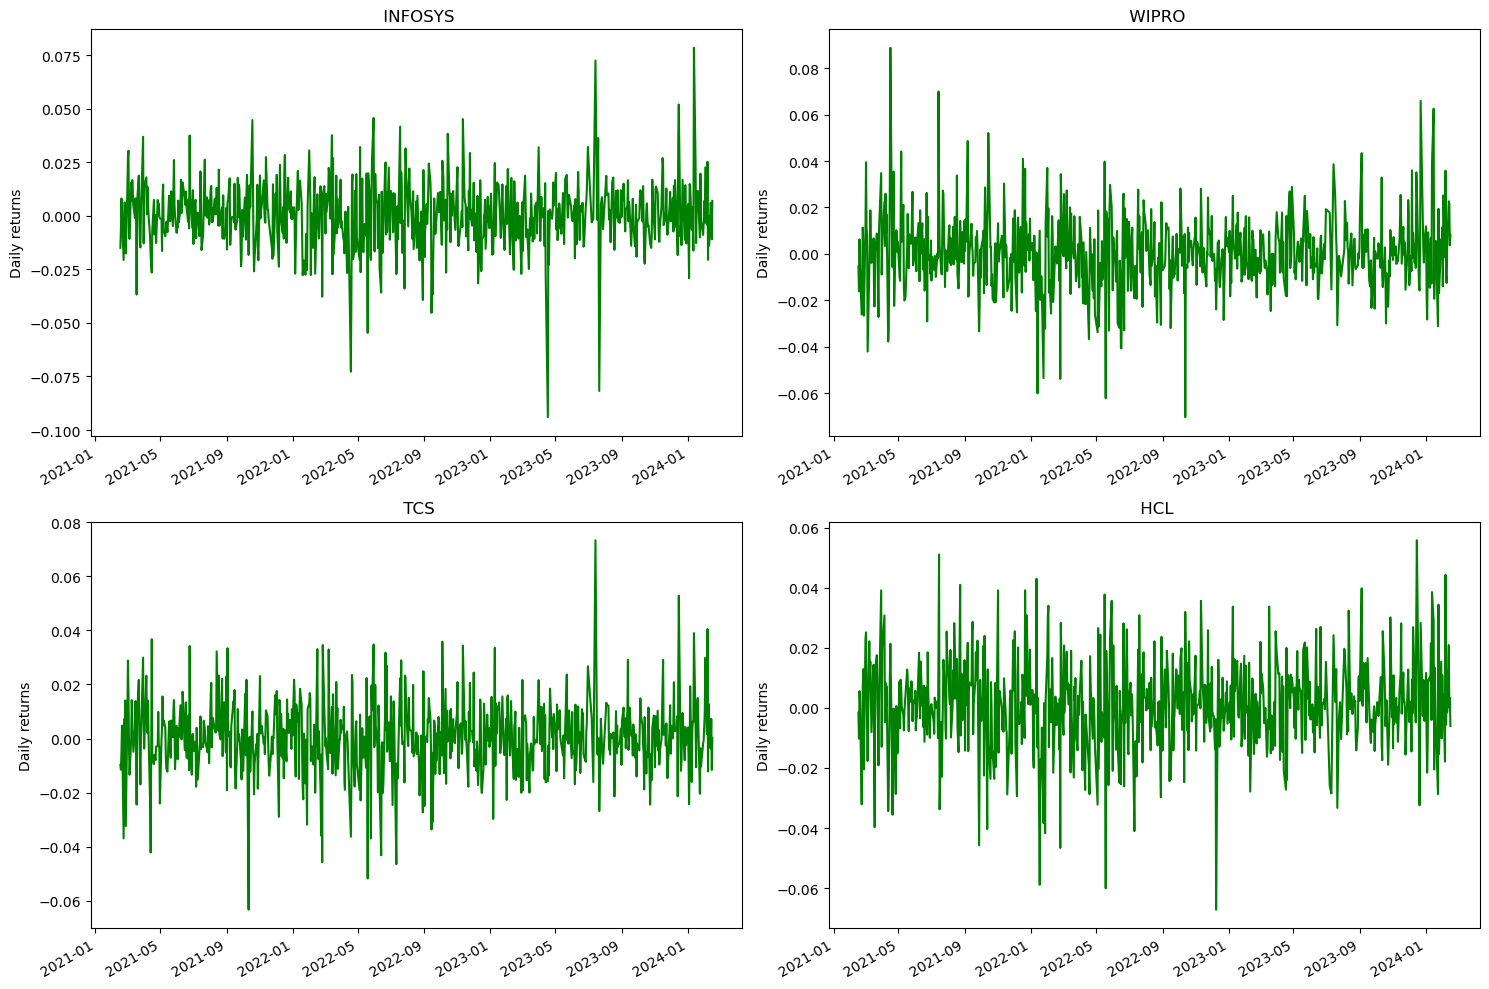

In [9]:
for df in company_list:
    df['Daily Returns'] = df['Adj Close'].pct_change()
    

mychart(company_list , 'Daily Returns' , '')

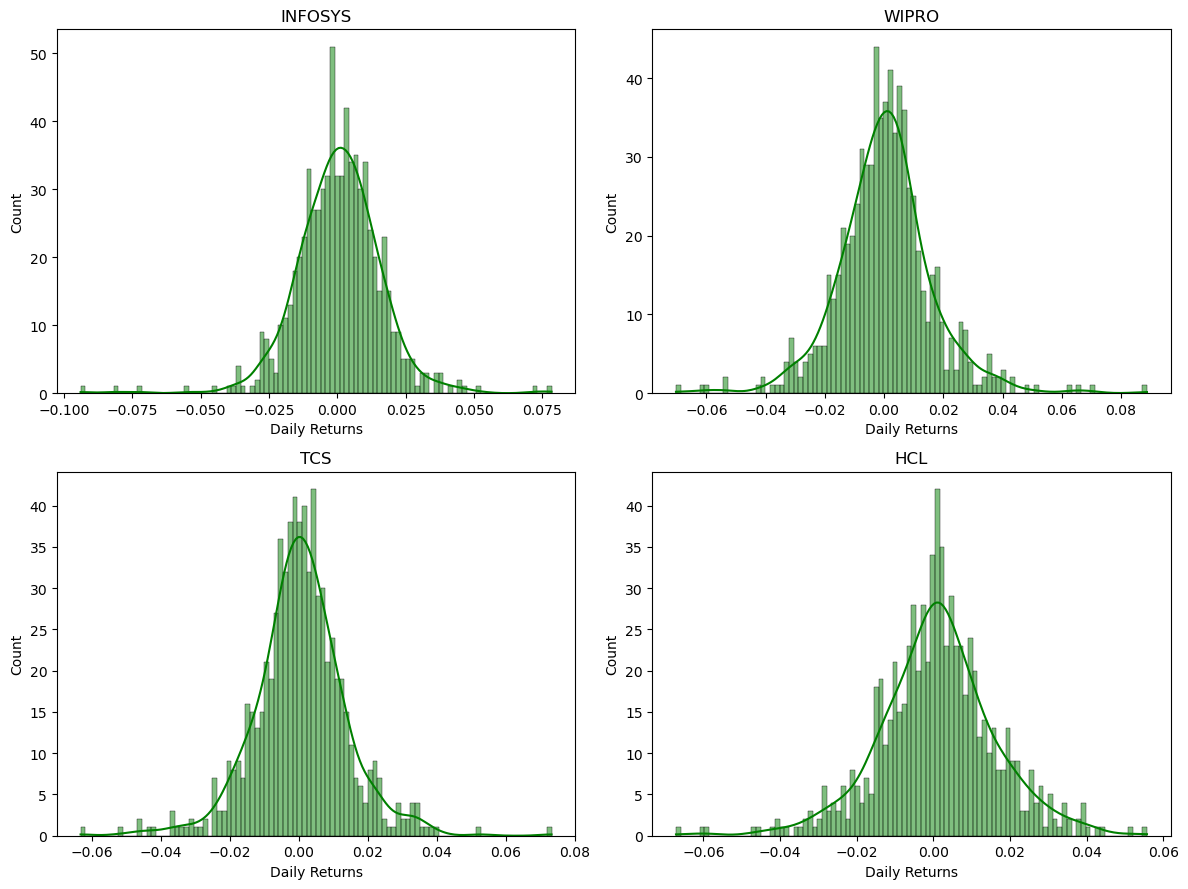

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.title(f"{com_names[i-1]}")
    sns.histplot(company['Daily Returns'], bins=100, color = 'green', kde=True)

plt.tight_layout()
    



#### Volatility is how much the price of something, like a stock, goes up and down. If the price changes a lot, it's high volatility, meaning it's riskier. If the price doesn't change much, it's low volatility, which is less risky. Investors look at volatility to understand how much an investment might go up or down.






In [25]:
for i, company in enumerate(company_list, 1):
    volatility = company['Daily Returns'].std()
    print( f"{com_names[i - 1]} = " , volatility)    

INFOSYS =  0.015494813817304564
WIPRO =  0.01599338562215695
TCS =  0.013361324817484992
HCL =  0.015213252030111963


## Calculating Cumulative Returns

#### Cumulative returns represent the total growth or decline in the value of an investment over time, considering all past gains and losses. It shows how much an investment has changed since the beginning of the investment period.
### In simpler terms:
        Positive cumulative returns mean the investment has gained value.
        Negative cumulative returns mean the investment has lost value.
        The cumulative return is the sum of all the individual returns over a specific period.
Investors use cumulative returns to assess the overall performance of an investment and understand the total impact of market fluctuations on their portfolio.



### $$ Cumulative Returns = (1 + Daily Returns).cumprod() - 1 $$

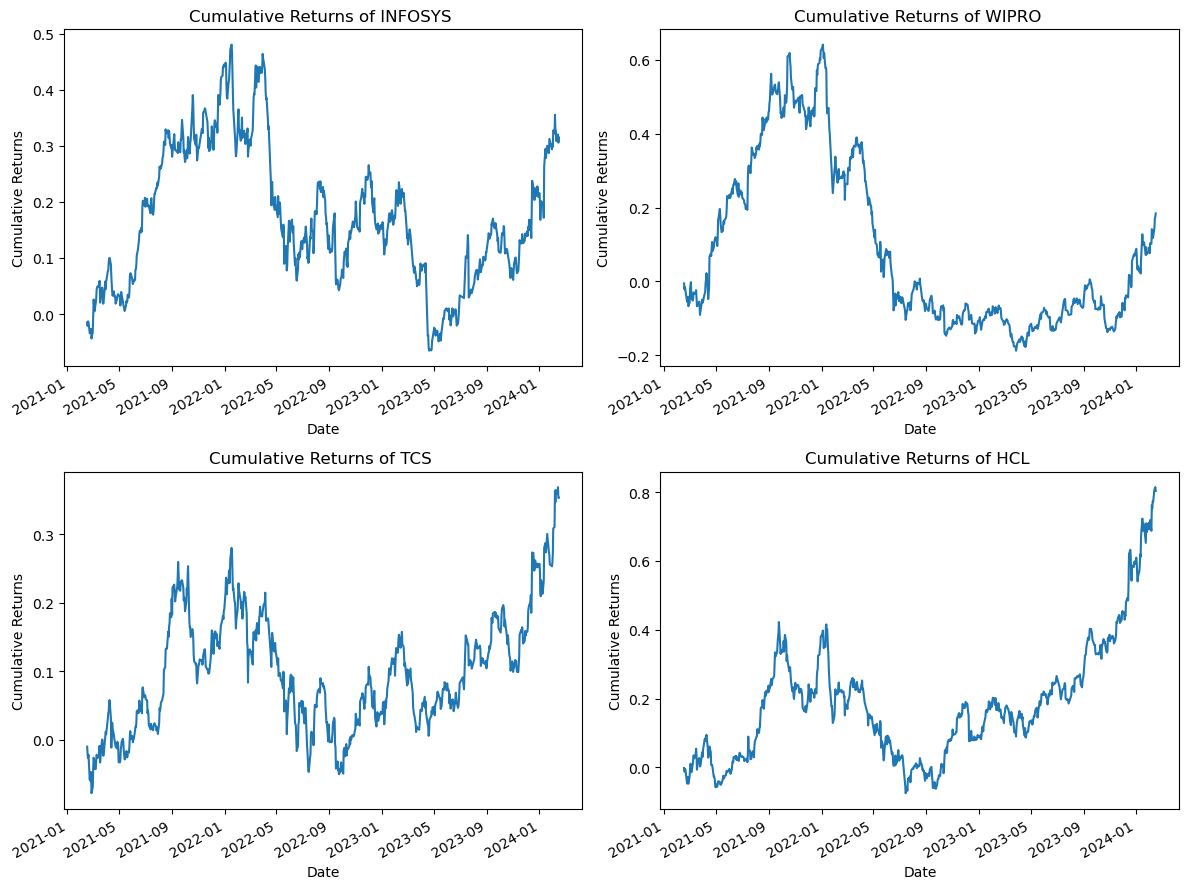

In [29]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    cumulative_returns = (1 + company['Daily Returns']).cumprod() - 1
    plt.subplot(2, 2, i)
    cumulative_returns.plot()
    plt.title(f"Cumulative Returns of {com_names[i - 1]} ")
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
plt.tight_layout()
    

## Rolling statistics / Moving averages

### plt.gca() returns the current Axes instance in the active figure, allowing you to specify where the plot should be drawn.



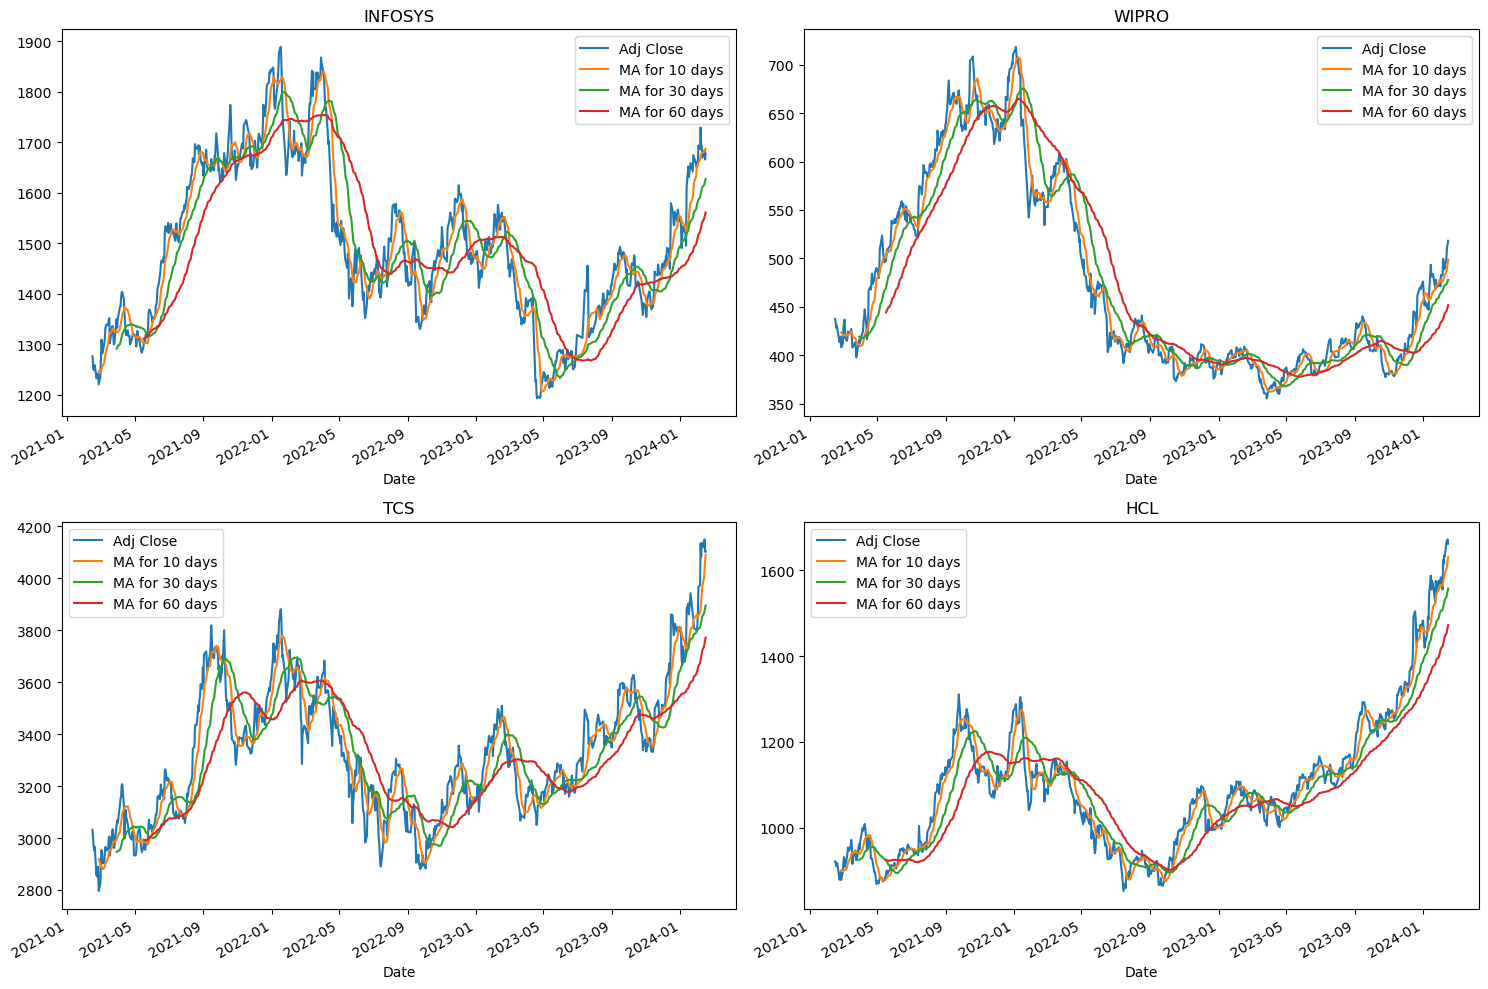

In [60]:
day = [10, 30, 60]

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    for ma in day:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

    plt.subplot(2, 2, i)
    company[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=plt.gca())
    plt.title(f"{com_names[i-1]}")

fig.tight_layout()
plt.show()


#### Creating a sample data frame to have data for only Daily Returns/pct_change
We also explore some Seaborn visualizations to understand the data in a better way

In [79]:
new_df = yf.download(stock_names, start, end)['Adj Close']
sample = new_df.pct_change()    
new_df.columns = com_names
sample.columns = com_names
sample.head()



[*********************100%%**********************]  4 of 4 completed


,INFOSYS,WIPRO,TCS,HCL
Date,,,,
2021-02-15,NaN,NaN,NaN,NaN
2021-02-16,-0.001624,-0.014965,-0.009761,-0.005345
2021-02-17,-0.010231,-0.006279,-0.011514,-0.016120
2021-02-18,0.005566,0.008073,-0.005189,0.006275
2021-02-19,0.001634,-0.000774,0.004759,-0.007159


### Correlation Plot [ Daily Returns vs Closing Price]

Text(0.5, 1.0, 'Correlation of Closing Prices')

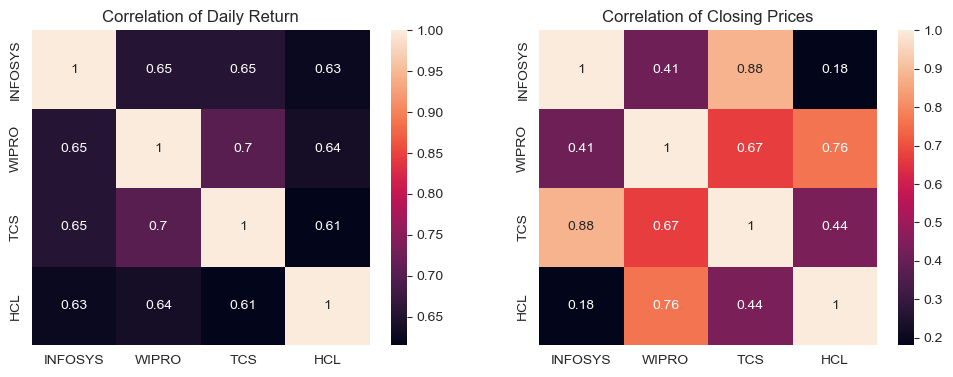

In [82]:
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
sns.heatmap(sample.corr() , annot= True )
plt.title('Correlation of Daily Return')
plt.subplot(2,2,2)
sns.heatmap(new_df.corr() , annot= True)
plt.title('Correlation of Closing Prices')

### A joint plot that compares the data of two companies ( INFY and HCL)

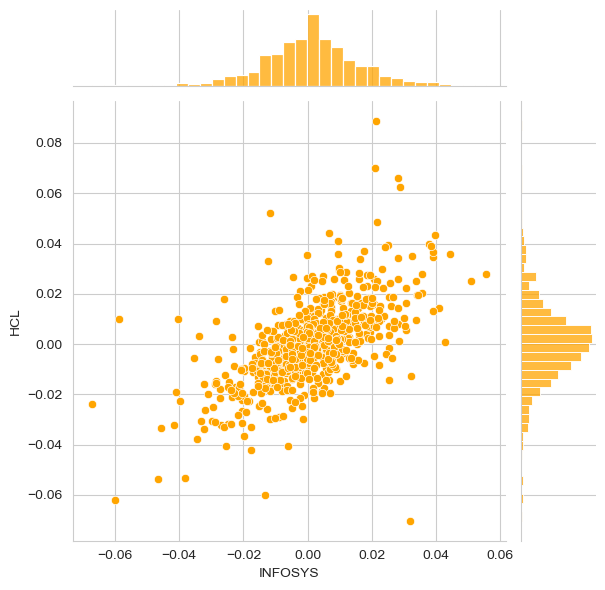

In [77]:
sns.jointplot(x = 'INFOSYS' , y = 'HCL' , data = sample , kind= 'scatter' , color = 'orange')

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


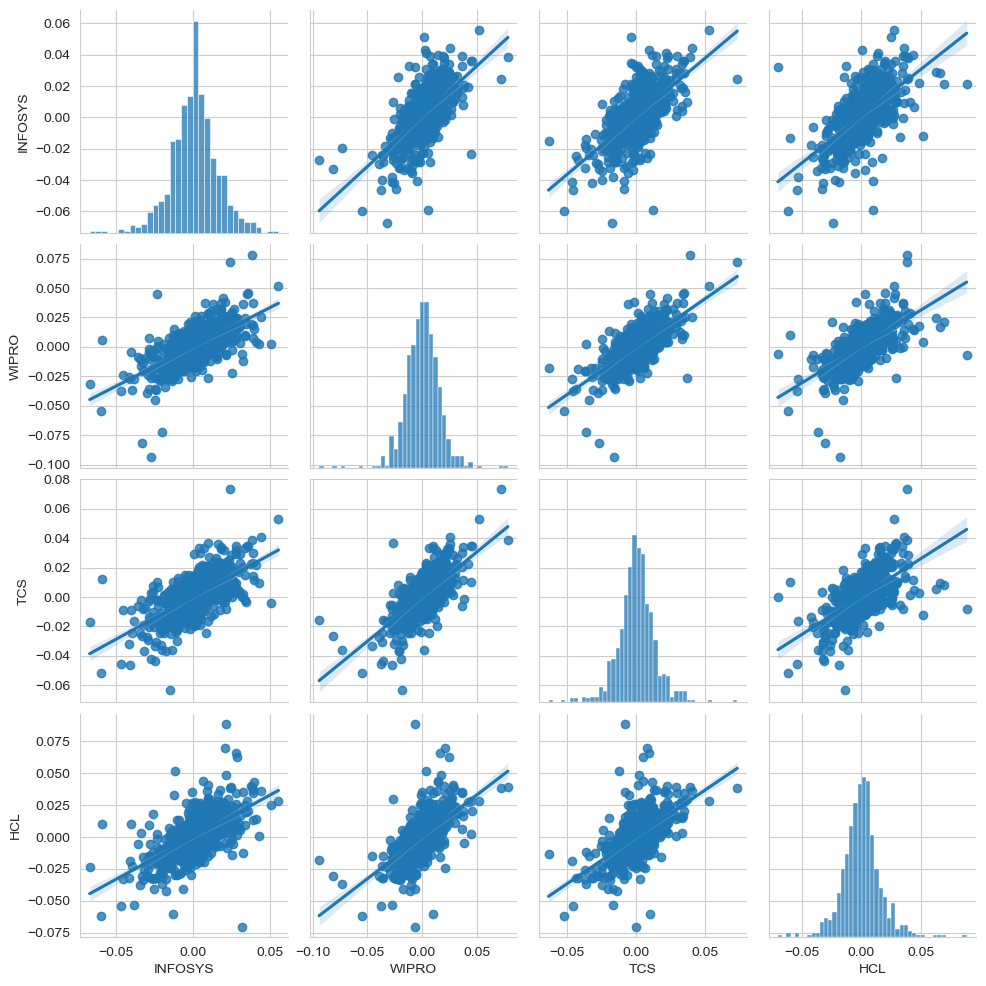

In [75]:
sns.set_style('whitegrid')
sns.pairplot( sample , kind= 'reg')

### In this notebook we downloaded financial data using yfinance and also explored the visualizations of matplotlib and seaborn. 